# Multilayer Perceptrons to Classify Handwritten Digits

Create a multilayer neural network to correctly classify handwritten digits using the MNIST database.

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline

## Load the Image Data

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [3]:
# Either you download data from BlackBoard - file is mnist-original.mat 
from sklearn.datasets import get_data_home
print(get_data_home())

C:\Users\apala\scikit_learn_data


In [4]:
# Or you download it here

In [5]:
mnist = fetch_openml("mnist_784")

In [6]:
# Look at a single digit 
mnist['data'].iloc[0].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target

In [8]:
# This function shows a digit
def showDigit(X,y,index):
    plt.imshow(X.iloc[index].values.reshape(28,28),cmap='Greys')
    print('Label:',y.iloc[index])

In [9]:
X.shape 

(70000, 784)

In [10]:
y.shape

(70000,)

Label: 9


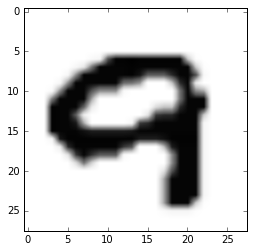

In [11]:
showDigit(X,y,28838)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/7.0, random_state=42)

Start with a 2 layer x 20 neuron MLP

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [16]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.37341106
Iteration 2, loss = 0.19226076
Iteration 3, loss = 0.16519857
Iteration 4, loss = 0.14987032
Iteration 5, loss = 0.13859451
Iteration 6, loss = 0.13302627
Iteration 7, loss = 0.12555098
Iteration 8, loss = 0.11828074
Iteration 9, loss = 0.11518369
Iteration 10, loss = 0.11203432
Iteration 11, loss = 0.11221612
Iteration 12, loss = 0.10929862
Iteration 13, loss = 0.10296393
Iteration 14, loss = 0.10223152
Iteration 15, loss = 0.10006003
Iteration 16, loss = 0.09789164
Iteration 17, loss = 0.09596886
Iteration 18, loss = 0.09692259
Iteration 19, loss = 0.09375461
Iteration 20, loss = 0.09081839
Iteration 21, loss = 0.08914521
Iteration 22, loss = 0.08785684
Iteration 23, loss = 0.08965215
Iteration 24, loss = 0.08445065
Iteration 25, loss = 0.08802386
Iteration 26, loss = 0.08430205
Iteration 27, loss = 0.08272094
Iteration 28, loss = 0.08474609
Iteration 29, loss = 0.08061312
Iteration 30, loss = 0.08180615
Iteration 31, loss = 0.07928617
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.1, max_iter=400,
              random_state=1, solver='sgd', verbose=10)

In [17]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.982667
Test set score: 0.951600


In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
y_pred = mlp.predict(X_test)

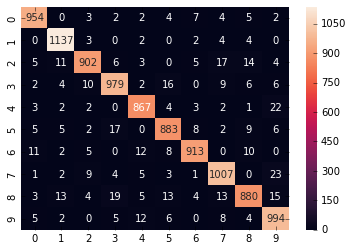

In [20]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d");

Next with a 2 layer x 100 neuron MLP

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [22]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.28436851
Iteration 2, loss = 0.10644669
Iteration 3, loss = 0.07789437
Iteration 4, loss = 0.05953592
Iteration 5, loss = 0.04796638
Iteration 6, loss = 0.03939351
Iteration 7, loss = 0.03427171
Iteration 8, loss = 0.02944522
Iteration 9, loss = 0.02200302
Iteration 10, loss = 0.02031417
Iteration 11, loss = 0.01521588
Iteration 12, loss = 0.01386167
Iteration 13, loss = 0.01208432
Iteration 14, loss = 0.00995939
Iteration 15, loss = 0.00894167
Iteration 16, loss = 0.00862449
Iteration 17, loss = 0.00474926
Iteration 18, loss = 0.00345749
Iteration 19, loss = 0.00189122
Iteration 20, loss = 0.00084956
Iteration 21, loss = 0.00058461
Iteration 22, loss = 0.00050390
Iteration 23, loss = 0.00046883
Iteration 24, loss = 0.00044069
Iteration 25, loss = 0.00042677
Iteration 26, loss = 0.00041646
Iteration 27, loss = 0.00040540
Iteration 28, loss = 0.00039772
Iteration 29, loss = 0.00039057
Iteration 30, loss = 0.00038493
Iteration 31, loss = 0.00037963
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.1,
              max_iter=400, random_state=1, solver='sgd', verbose=10)

In [23]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.979800


In [24]:
y_pred = mlp.predict(X_test)

<AxesSubplot:>

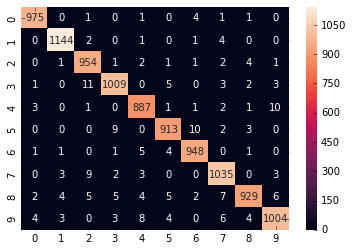

In [25]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [26]:
y_pred

array(['8', '4', '8', ..., '3', '8', '3'], dtype='<U1')

In [27]:
y_test

46730    8
48393    4
41416    8
34506    7
43725    7
        ..
20679    2
48140    8
59195    3
12633    8
39641    3
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [28]:
for i in range(0,200):
    if y_pred[i] != y_test[i]:
        print("Index:",i)

KeyError: 0

Label: 8
Predicted: 8


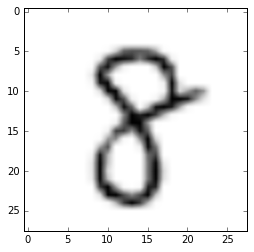

In [29]:
i = 13
showDigit(X_test,y_test,i)
print("Predicted:",y_pred[i])

Label: 2
Predicted: 2


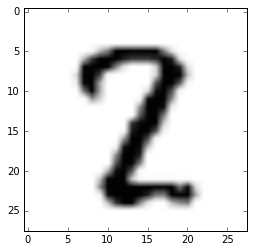

In [30]:
i = 46
showDigit(X_test,y_test,i)
print("Predicted:",y_pred[i])